## Statistisk analys av diamonds-datasetet: En forskning på faktorer som påverkar diamantvärdering

### Inledning

Denna rapport presenterar en statistisk analys av diamonds-datasetet, med syftet att förstå de olika faktorer som påverkar diamanters värde och erbjuder en möjlighet att analysera de faktorer som påverkar både kvalitet och pris på diamanter. Datasetet omfattar flera variabler:

- **Karat (Carat):** *Vikten av diamanten, som är en direkt indikator på dess storlek. 1 katar = 0,2g*

- **Slipning (Cut):** *Beskriver kvaliteten på slipningen av diamanten. Kvaliteten ökar i ordningen: Fair (Dålig), Good (Bra), Very Good (Mycket Bra), Premium (Premium), Ideal (Ideal).*

- **Färg (Color):** *Graderingen av diamantens färg, från färglös till ljusa färgtoner. Från "D" som är bäst till "J" som är sämst.*

- **Klarhet (Clarity):** *Bedömningen av hur tydliga inneslutningar är inuti diamanten (i ordning från bäst till sämst, FL = felfri, I3 = nivå 3 inneslutningar): FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3.*

- **Djup (Depth):** *Höjden av en diamant mätt från bordet till spetsen, dividerad med dess genomsnittliga omkrets diameter. Presenterad som en procentandel.*

- **Bord (Table):** *Storleken på den största ytan (toppen) av diamanten, också mätt som en procentandel av diametern.*

- **Dimensioner (X, Y, Z):** *De fysiska måtten på diamanten, där X och Y anger längd och bredd och Z anger djupet.*

### Bakgrund

Diamanter har länge värderats högt för sin sällsynthet och skönhet, vilket gör dem till ett intressant ämne för statistisk analys. Med en ökande tillgång på data, blir det möjligt att tillämpa statistiska metoder för att förstå vilka faktorer som mest påverkar priset på en diamant. 

### Syfte

Syftet med denna rapport är att tillämpa olika statistiska metoder, inklusive deskriptiv statistik, korrelationsanalys och linjär regression, för att undersöka och förstå hur olika egenskaper hos diamanter påverkar deras marknadsvärde. Genom att analysera dessa samband, syftar denna rapport att sträva efter att bidra till en djupare förståelse av värderingen av diamanter och kan tjäna som en guide för framtida köpare och säljare inom denna bransch.

### Frågeställningar

Följande frågeställningar kommer att utforskas i denna rapport:
- Hur påverkar fysiska egenskaper som karat, slipning, färg och klarhet priset på en diamant?
- Finns det en stark korrelation mellan diamantens storlek (mätt i karat) och dess pris?
- Vilken roll spelar bordsstorleken (table) för diamantens pris och upplevda kvalitet, och hur relaterar den till andra variabler som klarhet och färg?
- Kan vi bygga en prediktiv modell för att förutsäga priset på en diamant baserat på dess egenskaper?

In [15]:
# Importer av bibliotek och inläsning av dataset
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

diamonds = pd.read_csv('data/diamonds.csv')

### Deskriptiva mått

**Datasetet består av 53 940 observationer.**

**Här nedan är en översikt av deskriptiv statistik för varje variabel:**

In [16]:
# Beräknar och visar deskriptiv statistik för datasetet
descriptive_stats = diamonds.describe()

descriptive_stats

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Carat (Vikt): Genomsnittligt värde är ca 0.80, med standardavvikelse ca 0.47. Värdet varierar från 0.20 till 5.01.

Depth (Djup): Genomsnittligt djup är ca 61.75% med en liten standardavvikelse, vilket tyder på att de flesta diamanter ligger nära detta värde.

Table (Bordet): Genomsnittligt värde är ca 57.46%, återigen med liten standardavvikelse.

Price (Pris): Genomsnittligt pris är ungefär 3933 med stor variation (standardavvikelse ca 3989).

X, Y, Z (Dimensioner): Dessa representerar diamantens fysiska dimensioner. Medelvärdet för X (längd) är ca 5.73, Y (bredd) är ca 5.73, och Z (djup) är ca 3.54.

### Utför en grundläggande analys av 'cut', 'color', och 'clarity' då de är kategoriska

In [17]:
# Räknar förekomsten av den kategoriska datan
cut_analysis = diamonds['cut'].value_counts()
color_analysis = diamonds['color'].value_counts()
clarity_analysis = diamonds['clarity'].value_counts()

# Skapar en dataframe och ger dem kolumnnamn
cut_analysis_df = pd.DataFrame({'Cut count': cut_analysis})
color_analysis_df = pd.DataFrame({'Color count': color_analysis})
clarity_analysis_df = pd.DataFrame({'Clarity count': clarity_analysis})

# Kombinera dataframes horisontellt
combined_df = pd.concat([cut_analysis_df, color_analysis_df, clarity_analysis_df], axis=1)

print("Förekomst av kategorisk data:\n", combined_df)

Förekomst av kategorisk data:
            Cut count  Color count  Clarity count
Ideal        21551.0          NaN            NaN
Premium      13791.0          NaN            NaN
Very Good    12082.0          NaN            NaN
Good          4906.0          NaN            NaN
Fair          1610.0          NaN            NaN
G                NaN      11292.0            NaN
E                NaN       9797.0            NaN
F                NaN       9542.0            NaN
H                NaN       8304.0            NaN
D                NaN       6775.0            NaN
I                NaN       5422.0            NaN
J                NaN       2808.0            NaN
SI1              NaN          NaN        13065.0
VS2              NaN          NaN        12258.0
SI2              NaN          NaN         9194.0
VS1              NaN          NaN         8171.0
VVS2             NaN          NaN         5066.0
VVS1             NaN          NaN         3655.0
IF               NaN          NaN     

### Baserat på ovan information, ser vi att kategorierna 'I3', 'I2', och 'FL' för 'clarity' inte finns med i datasetet.

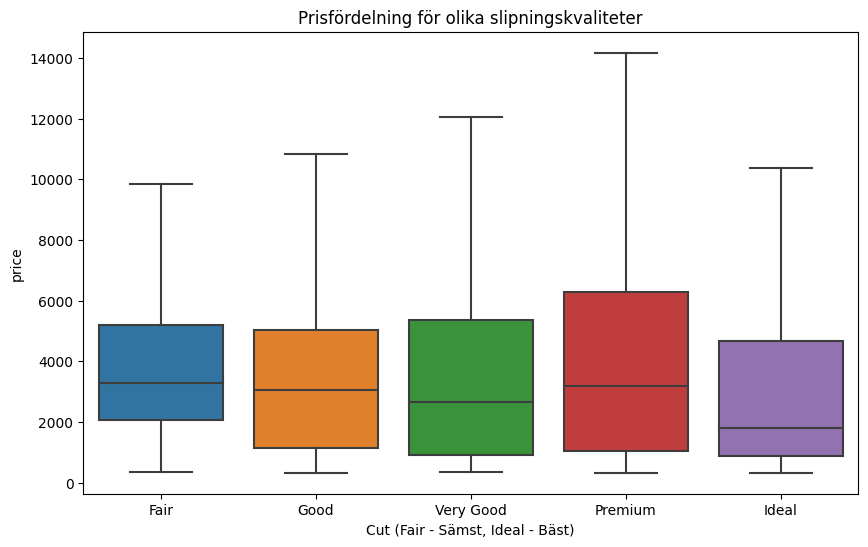

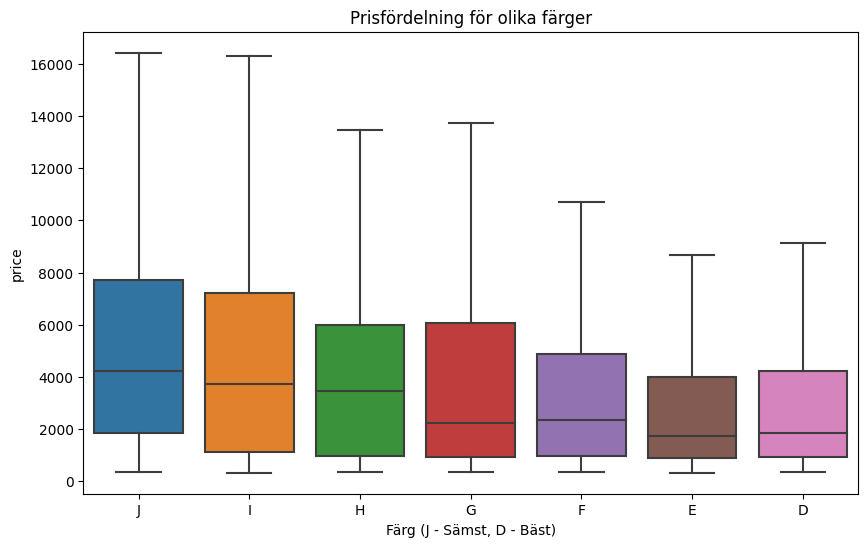

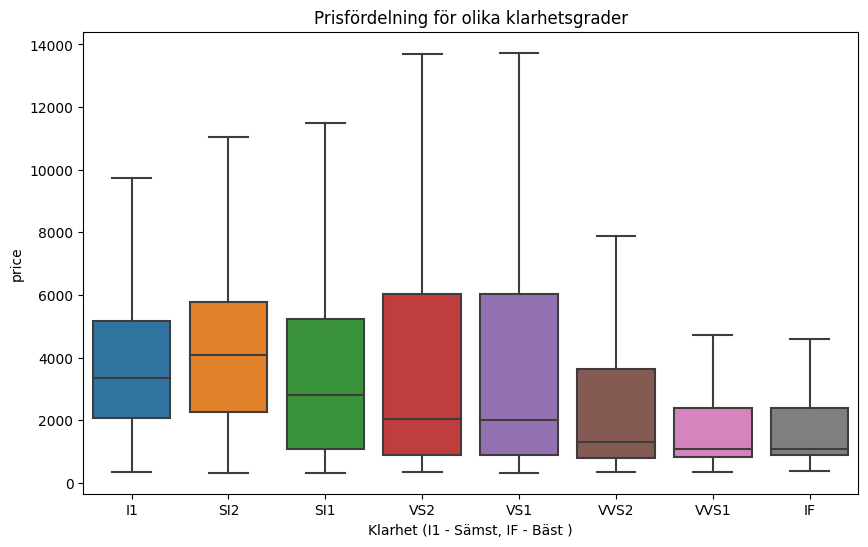

In [18]:
# Ordnar kategorierna för 'cut', 'color', och 'clarity' baserat på kvalitet
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Boxplot för 'cut'
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=diamonds, order=cut_order, showfliers=False)
plt.title('Prisfördelning för olika slipningskvaliteter')
plt.xlabel('Cut (Fair - Sämst, Ideal - Bäst)')
plt.show()

# Boxplot för 'color'
plt.figure(figsize=(10, 6))
sns.boxplot(x='color', y='price', data=diamonds, order=color_order, showfliers=False)
plt.title('Prisfördelning för olika färger')
plt.xlabel('Färg (J - Sämst, D - Bäst)')
plt.show()

# Boxplot för 'clarity'
plt.figure(figsize=(10, 6))
sns.boxplot(x='clarity', y='price', data=diamonds, order=clarity_order, showfliers=False)
plt.title('Prisfördelning för olika klarhetsgrader')
plt.xlabel('Klarhet (I1 - Sämst, IF - Bäst )')
plt.show()

**Med hjälp av dessa boxplots för varje kategori av cut, color, och clarity kan vi göra följande observationer:**

**Slipning (Cut):**
- Medianpriset för Ideal är faktiskt lägre än för andra kategorier som Fair, Good, och Premium. Detta kan verka motsägelsefullt eftersom Ideal är den högsta kvaliteten på slipning. Detta kan tyda på att även om Ideal slipningen är tekniskt bättre, kanske inte konsumenterna är villiga att betala en premie för denna specifikation jämfört med andra faktorer som storlek eller klarhet.

**Färg (Color):**
- Enligt dessa medianpriser är diamanter med färgkvalitet 'J' (den sämsta enligt skalan) dyrare än de med bättre färgkvalitet. Detta kan bero på att 'J' färgade diamanter kan vara större i storlek eller har bättre klarhet, vilket kompenserar för lägre färgkvalitet.

**Klarhet (Clarity):**
- 'IF' (Internally flawless), som är den högsta klarhetsgraden i detta dataset, har ett lägre medianpris jämfört med andra klarhetskategorier som 'SI2' och 'I1'. Detta kan tyda på att konsumenterna kanske inte ser lika mycket värde i att betala extra för den högsta klarhetsgraden.
'SI2' har det högsta medianpriset bland klarhetskategorierna, vilket kan antyda att diamanter i denna kategori oftare har önskvärda egenskaper som storlek eller färg som påverkar deras pris.


### Korrelationsmastris 

**Inkluderar kategoriska variabler (Cut, Clarity och Color) i korrelationsmatrisen eftersom de tillhör kategorin 'Ordinal' och har en inneboende ordning.**

In [19]:
# Tilldelar numeriska värden för cut, color, och clarity
cut_mapping = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}
color_mapping = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
clarity_mapping = {'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1}

diamonds['cut_ordinal'] = diamonds['cut'].map(cut_mapping)
diamonds['color_ordinal'] = diamonds['color'].map(color_mapping)
diamonds['clarity_ordinal'] = diamonds['clarity'].map(clarity_mapping)

# Exkluderar de ursprungliga kategoriska kolumnerna
diamonds_numeric = diamonds.drop(columns=['cut', 'color', 'clarity'])

# Beräknar korrelationsmatrisen med de numeriska och omkodade kategoriska variablerna
extended_correlation_matrix = diamonds_numeric.corr()

# Visar den utökade korrelationsmatrisen
extended_correlation_matrix

,carat,depth,table,price,x,y,z,cut_ordinal,color_ordinal,clarity_ordinal
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,-0.134967,-0.291437,-0.352841
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.218055,-0.047279,-0.067384
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,-0.433405,-0.026465,-0.160327
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,-0.053491,-0.172511,-0.146800
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,-0.125565,-0.270287,-0.371999
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,-0.121462,-0.263584,-0.358420
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,-0.149323,-0.268227,-0.366952
cut_ordinal,-0.134967,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323,1.000000,0.020519,0.189175
color_ordinal,-0.291437,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227,0.020519,1.000000,-0.025631
clarity_ordinal,-0.352841,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952,0.189175,-0.025631,1.000000


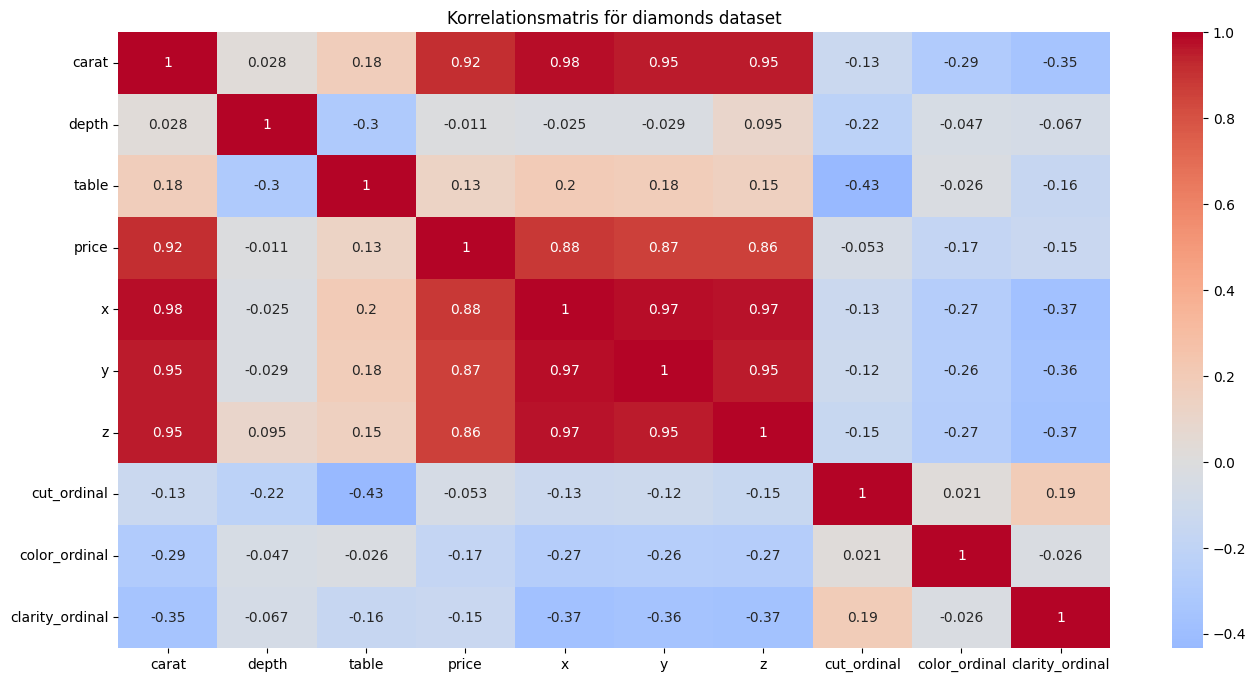

In [20]:
# Plottar korrelationsmatrisen med en värme-karta
plt.figure(figsize=(16, 8))

heatmap = sns.heatmap(extended_correlation_matrix, annot=True, cmap='coolwarm', center=0)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, )

plt.title("Korrelationsmatris för diamonds dataset")
plt.show()

**Några nyckelobservationer från heat-mappen:**

- **1. Karat och pris:** *En stark positiv korrelation (0.92) mellan karat och pris bekräftar att större diamanter (högre karat) tenderar att ha högre priser.*

- **2. Karat och Dimensioner (X, Y, Z):**  *Även här ser vi mycket starka positiva korrelationer (0.97-0.95), vilket stämmer överens med att större diamanter också betyder fler karat*

- **3. Dimensioner (X, Y, Z) och Pris:** *Det finns starka positiva korrelationer (0.86-0.88) mellan diamanternas fysiska dimensioner och pris. Detta tyder på att större diamanter ofta är dyrare.*

- **4. Cut, Color, Clarity och Pris:** *Dessa variabler visar svagare negativa korrelationer med pris, vilket innebär att lägre kvalitet (lägre värden i kodning) är associerade med högre priser, vilket är motsatt det man vanligtvis skulle förvänta sig.*

- **5. Clarity och dess relation till andra egenskaper:** *Klarhet har måttliga negativa korrelationer med dimensionerna och karat, vilket kan tyda på att diamanter med högre klarhet är generellt mindre i storlek.*

- **6. Cut och Table size:** *Det finns en stark negativ korrelation (-0.43) mellan cut_ordinal och table, vilket kan tyda på att diamanter med högre kvalitet på slipningen (högre siffror i kodning) ofta har mindre bordsstorlekar.*

**Plotten nedan visar att lägre frekvens ger högre pris**

*Detta kan indikera på att sällsynta diamanter ofta har högre pris*

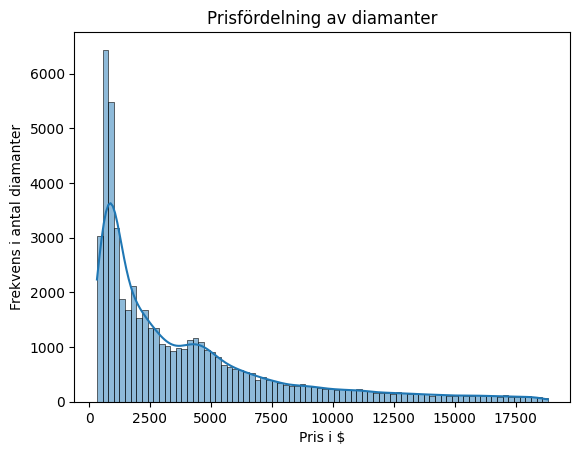

In [21]:
sns.histplot(diamonds['price'], kde=True) # Histogram + linje för sannolikhetsfördelningen
plt.title('Prisfördelning av diamanter')
plt.xlabel('Pris i $')
plt.ylabel('Frekvens i antal diamanter')
plt.show()

### En interaktiv scatterplot som visar relationen mellan karat och priset, med klarhet och cut representerade av färgton

In [22]:
# Skapar en sample av 5000 diamanter för scatterplotten
sample_diamonds = diamonds.sample(n=5000, random_state=1)

# Kombinerar clarity_ordinal och color_ordinal för att skapa en ny färgskala
sample_diamonds['combined_quality'] = (sample_diamonds['clarity_ordinal'] + sample_diamonds['color_ordinal']) / 2
max_combined_quality = sample_diamonds['combined_quality'].max()
sample_diamonds['color_scale'] = sample_diamonds['combined_quality'] / max_combined_quality

# Skapar en interaktiv scatter plot
fig = px.scatter(sample_diamonds, 
    x='carat', 
    y='price', 
    size='carat',  # Storleken på symbolerna baserat på karat
    color='color_scale',  # Färg baserad på kombinerad kvalitet
    symbol_sequence=['diamond'],  # Diamantformade symboler
    hover_data=['cut', 'color', 'clarity', 'carat', 'price'],
    title='Scatterplot av diamanters karat vs pris',
    labels={'carat': 'Karat', 'price': 'Pris ($)', 'color_scale': 'Kombinerad klarhet och färg(0-1) där 1 är bäst: '},
    color_continuous_scale=['orange', 'white'])  # Använder en färgskala från orange till vit

# Uppdaterar layouten med specifika dimensioner
fig.update_layout(
    width=1300,  # Bredd på plotten i pixlar
    height=600,  # Höjd på plotten i pixlar
    legend=dict(
        x=1.2,  # Justera x-positionen för legenden
        y=0.8,  # Justera y-positionen för legenden
        bgcolor='rgba(255, 255, 255, 0.5)',  # Bakgrundsfärg för legenden
        bordercolor='rgba(0, 0, 0, 0.5)',  # Kantfärg för legenden
        borderwidth=1
    )
)

fig.show()

**Scatterplotten ovan visar att det finns en tendens för diamanter med lägre karat att vara av högre kvalite. Även att högre kvalité korrelerar med högre pris. Detta stämmer bättre överrens med marknastrender till skillnad från tidigare boxplots och dess medianvärden som gav oss det motsatta resultatet.** 

## Linjär regression
**Med syfte att förutsäga priset på diamanter baserat på variabler som karat, slipning, färg och klarhet.**

In [23]:
# Förberedelse av data för linjär regression
# Använder carat, cut_ordinal, color_ordinal, och clarity_ordinal som förklarande variabler
X = diamonds[['carat', 'cut_ordinal', 'color_ordinal', 'clarity_ordinal']]
y = diamonds['price']

# Delar upp data i tränings- och testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skapar en linjär regressionsmodell
model = LinearRegression()

# Träna modellen med träningsdatan
model.fit(X_train, y_train)

# Förutsäger priser på testdatan
y_pred = model.predict(X_test)

# Beräknar Mean Squared Error (MSE) och R2-Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1541096.3488868831, 0.9030563214406129)

**MSE (1541096.35):** *Detta är det genomsnittliga felet i modellens förutsägelser. MSE mäter skillnaden mellan de faktiska och förutsagda priserna. Ett lägre värde är bättre, eftersom det innebär att modellen gör färre och mindre fel. I detta fall är MSE relativt hög, vilket kan tyda på att modellen inte helt exakt fångar alla aspekter som påverkar diamantpriserna. Detta kan bero på vissa outliers kan kraftigt öka värdet av MSE, även om många andra förutsägelser är ganska exakta.*

**R2-Score (0.903):** *Detta värde anger hur väl modellen förklarar variansen i datat. R2-värdet sträcker sig från 0 till 1, där ett högre värde är bättre. Ett värde av 0.903 innebär att ca 90.3% av variansen i diamantpriserna kan förklaras av de variabler jag valt. Detta är ett starkt resultat som visar att modellen är ganska effektiv på att förutsäga diamantpriser.*

In [24]:
# Lägger till en konstant till X
X = sm.add_constant(X)

# Skapar och tränar OLS-modellen
model = sm.OLS(y, X).fit()

# Sammanfattning av modellen
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                 1.272e+05
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:01:52   Log-Likelihood:            -4.6053e+05
No. Observations:               53940   AIC:                         9.211e+05
Df Residuals:                   53935   BIC:                         9.211e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -7218.5545     33.296   -2

**Koefficienter:** *Dessa värden anger hur mycket varje variabel bidrar till priset. Till exempel ökar carat priset med ca 8783.77 för varje enhetsökning, medan cut_ordinal, color_ordinal, och clarity_ordinal har mindre men ändå signifikant påverkan.*

**P-värden:** Alla dessa är mycket låga, vilket tyder på att dessa variabler signifikant påverkar priset på diamanter. Låga p-värden indikerar att resultaten inte är slumpmässiga.

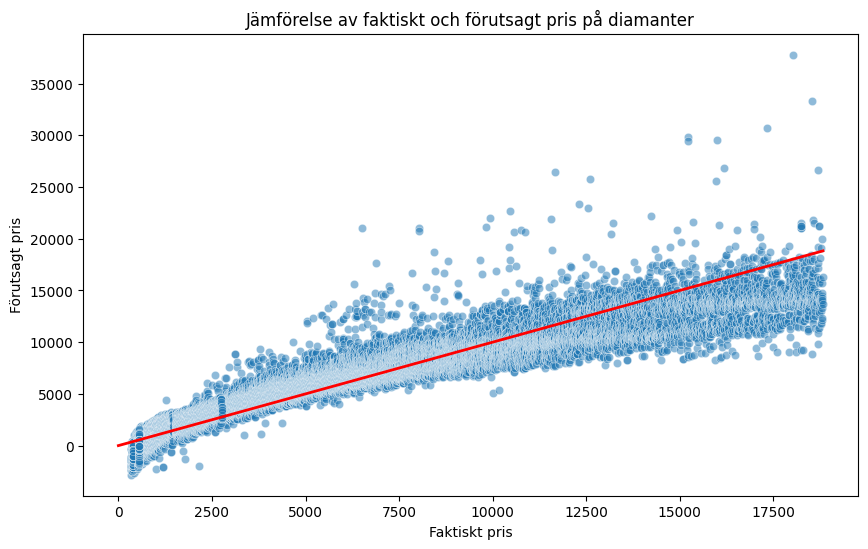

In [25]:
# Använder modellens koefficienter för att göra förutsägelser
diamonds['predicted_price'] = (
    -7218.5545 + 
    diamonds['carat'] * 8783.7718 + 
    diamonds['cut_ordinal'] * 155.6999 + 
    diamonds['color_ordinal'] * 319.6727 + 
    diamonds['clarity_ordinal'] * 524.8435
)
# Skapar scatterplotten
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='predicted_price', data=diamonds, alpha=0.5)
plt.xlabel('Faktiskt pris')
plt.ylabel('Förutsagt pris')
plt.title('Jämförelse av faktiskt och förutsagt pris på diamanter')

# Lägger till linjen för förutsägelse
plt.plot([0, max(diamonds['price'])], [0, max(diamonds['price'])], color='red', lw=2)

plt.show()

In [26]:
# Beräknar medelvärde och standardavvikelse
mean_price = np.mean(diamonds['price'])
std_price = np.std(diamonds['price'])

# Beräknar konfidensintervallet
confidence_interval = stats.norm.interval(0.95, loc=mean_price, scale=std_price/np.sqrt(len(diamonds)))

print("95% konfidensintervall för medelpriset på diamanter är:", confidence_interval)

95% konfidensintervall för medelpriset på diamanter är: (3899.133025445021, 3966.4664183814534)


**Det 95% konfidensintervallet som har beräknats för medelpriset på diamanter, (3899.13 till ca 3966.47 dollar), ger en uppskattning av intervallet inom vilket det sanna medelpriset för diamanterna i hela populationen förväntas ligga, med 95% säkerhet.**